# 이진분류 모델링

In [529]:
import numpy as np
import pandas as pd

In [530]:
df=pd.read_csv('C:/Users/EunSeon/Downloads/dataset_230928.csv')

In [531]:
df=df[df['유효대수']>0]
df['사고율']=df['사고대수']/df['유효대수']

In [532]:
df = pd.get_dummies(df, columns = ['직전3년간사고건수'], drop_first = False)
df = pd.get_dummies(df, columns = ['운전자한정특별약관코드'], drop_first = False)

In [533]:
df['마일리지할인율_재범주']=0
df.loc[df['마일리지할인율\t'] == 0, '마일리지할인율_재범주'] = 1
df.loc[df['마일리지할인율\t'] == 3000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율\t'] == 5000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율\t'] == 7000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율\t'] == 10000, '마일리지할인율_재범주'] = 2
df.loc[df['마일리지할인율\t'] == 12000, '마일리지할인율_재범주'] = 3
df.loc[df['마일리지할인율\t'] == 15000, '마일리지할인율_재범주'] = 3
df=pd.get_dummies(df, columns = ['마일리지할인율_재범주'], drop_first = False)
df=df.drop(['마일리지할인율\t'],axis=1)

In [534]:
df['고경력운전자']=0
df.loc[df['가입경력코드'] == 8, '고경력운전자'] = 1
df['저경력운전자']=0
df.loc[df['가입경력코드'] == 1, '저경력운전자'] = 1
#30~50대를 구분하는 변수를 하나 넣었어요.. ! 데이터를 가만히 들여다보니 30~50대가 사고율이 낮은데 연령대를 순서형으로 사용해서 실제 사고율에 미치는 영향보다 뻥튀기된 것 같더라고요.. ^ㅡㅜ
df['30대~50대']=0
df.loc[df['피보험자연령대'] == 30, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 40, '30대~50대'] = 1
df.loc[df['피보험자연령대'] == 50, '30대~50대'] = 1

In [535]:
df=df.drop(['유효대수','사고대수','사고여부'],axis=1)

In [536]:
df['이상치']=0
df.loc[df['사고율'] >= 1, '이상치'] = 1

In [537]:
from sklearn.model_selection import train_test_split
X = df.drop(["이상치",'사고율'], axis=1)
y = df[["이상치",'사고율']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=31)

## Logistic Regression

로지스틱 회귀로 사고율이 1 이상인 고객을 분류

In [538]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import matthews_corrcoef

In [539]:
class_y_train=y_train['이상치']
class_y_test=y_test['이상치']

In [540]:
#모든 변수를 모델링에 넣으면 모델이 수렴하지 않는 문제가 생겨 최대한 기존의 변수를 살림
#R 로지스틱 회귀 모델에서 유의하지 않다고 나온 변수들을 제거 
class_X_train=X_train.drop(['직전3년간사고건수_유무','마일리지할인율_가입여부','운전자한정특별약관코드_2','운전자한정특별약관코드_5','운전자한정특별약관코드_6','운전자한정특별약관코드_7','운전자한정특별약관코드_10','운전자한정특별약관코드_11','운전자한정특별약관코드_12','저경력운전자','차량가입금액','마일리지할인율_재범주_2','차종그루핑','자차보험가입여부'
],axis=1)
class_X_test=X_test.drop(['직전3년간사고건수_유무','마일리지할인율_가입여부','운전자한정특별약관코드_2','운전자한정특별약관코드_5','운전자한정특별약관코드_6','운전자한정특별약관코드_7','운전자한정특별약관코드_10','운전자한정특별약관코드_11','운전자한정특별약관코드_12','저경력운전자','차량가입금액','마일리지할인율_재범주_2','차종그루핑','자차보험가입여부'
],axis=1)

In [541]:
import statsmodels.api as sm
model = sm.Logit(class_y_train, class_X_train)
results = model.fit(maxiter=1000)
results.summary()

Optimization terminated successfully.
         Current function value: 0.384518
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    이상치   No. Observations:               134116
Model:                          Logit   Df Residuals:                   134097
Method:                           MLE   Df Model:                           18
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                 0.05118
Time:                        21:02:05   Log-Likelihood:                -51570.
converged:                       True   LL-Null:                       -54352.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
피보험자연령대           0.0063      0.001      9.615      0.000       0.005       0.008
피보험자성별코드         -0.2166      0.016    -13.220      0.000      -0.249      -0.184
국산구분코드            0.1974      0.018     11.114      0.000       0.163       0.232
차량경과년수           -0.0266      0.009     -3.052      0.002      -0.044      -0.010
가입경력코드           -0.0900      0.006    -15.753      0.000      -0.101      -0.079
영상기록장치특약요율       -0.1257      0.017     -7.382      0.000      -0.159      -0.092
차종               -0.0291      0.006     -5.123      0.000      -0.040      -0.018
직전3년간사고건수_0      -0.8212      0.079    -10.412      0.000      -0.976      -0.667
직전3년간사고건수_1      -0.3157      0.080     -3.926      0.000      -0.473      -0.158
직전3년간사고건수_2       0.1467      0.082      1.779      0.075      -0.015       0.308
직전3년간사고건수_3       0.7406      0.084      8.808      0.000       0.576       0.905
직전3년간사고건수_4      -0.2958      0.078     -3.807      0.000      -0.448      -0.144
운전자한정특별약관코드_1    -0.0238      0.026     -0.929      0.353      -0.074       0.026
운전자한정특별약관코드_3    -0.4524      0.023    -20.064      0.000      -0.497      -0.408
운전자한정특별약관코드_4    -0.3070      0.021    -14.906      0.000      -0.347      -0.267
마일리지할인율_재범주_1    -0.1988      0.051     -3.895      0.000      -0.299      -0.099
마일리지할인율_재범주_3    -0.5340      0.051    -10.574      0.000      -0.633      -0.435
고경력운전자           -0.4816      0.027    -17.654      0.000      -0.535      -0.428
30대~50대          -0.2547      0.019    -13.745      0.000      -0.291      -0.218
=================================================================================
"""

In [542]:
#추가적으로 유의하지 않다고 나온 변수 제거
class_X_train=class_X_train.drop(['운전자한정특별약관코드_1'],axis=1)
class_X_test=class_X_test.drop(['운전자한정특별약관코드_1'],axis=1)

In [543]:
model = sm.Logit(class_y_train, class_X_train)
results = model.fit(maxiter=1000)
results.summary()

Optimization terminated successfully.
         Current function value: 0.384521
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    이상치   No. Observations:               134116
Model:                          Logit   Df Residuals:                   134098
Method:                           MLE   Df Model:                           17
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                 0.05117
Time:                        21:02:07   Log-Likelihood:                -51570.
converged:                       True   LL-Null:                       -54352.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
피보험자연령대           0.0063      0.001      9.597      0.000       0.005       0.008
피보험자성별코드         -0.2166      0.016    -13.225      0.000      -0.249      -0.185
국산구분코드            0.1967      0.018     11.085      0.000       0.162       0.231
차량경과년수           -0.0265      0.009     -3.041      0.002      -0.044      -0.009
가입경력코드           -0.0900      0.006    -15.752      0.000      -0.101      -0.079
영상기록장치특약요율       -0.1253      0.017     -7.363      0.000      -0.159      -0.092
차종               -0.0288      0.006     -5.077      0.000      -0.040      -0.018
직전3년간사고건수_0      -0.8272      0.079    -10.523      0.000      -0.981      -0.673
직전3년간사고건수_1      -0.3217      0.080     -4.013      0.000      -0.479      -0.165
직전3년간사고건수_2       0.1407      0.082      1.711      0.087      -0.020       0.302
직전3년간사고건수_3       0.7344      0.084      8.762      0.000       0.570       0.899
직전3년간사고건수_4      -0.3017      0.077     -3.897      0.000      -0.453      -0.150
운전자한정특별약관코드_3    -0.4460      0.021    -20.764      0.000      -0.488      -0.404
운전자한정특별약관코드_4    -0.3007      0.019    -15.457      0.000      -0.339      -0.263
마일리지할인율_재범주_1    -0.1994      0.051     -3.907      0.000      -0.299      -0.099
마일리지할인율_재범주_3    -0.5337      0.051    -10.567      0.000      -0.633      -0.435
고경력운전자           -0.4807      0.027    -17.633      0.000      -0.534      -0.427
30대~50대          -0.2552      0.019    -13.782      0.000      -0.292      -0.219
=================================================================================
"""

In [544]:
#최종 모델 적합
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(class_X_train, class_y_train)
y_pred = model.predict(class_X_test)

In [545]:
y_prob = model.predict_proba(class_X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(class_y_test, y_prob)

In [546]:
roc_auc = auc(fpr, tpr)
roc_auc

0.660474959202698

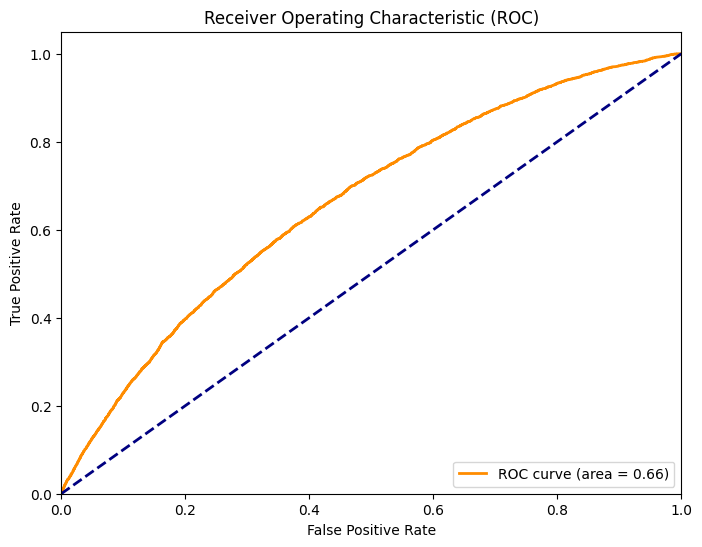

In [547]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [548]:
optimal_idx=np.argmax(tpr-fpr)
optimal=thresholds[optimal_idx]

optimal

0.1326673193111588

클래스 불균형이 존재하기 때문에 threshold를 따로 지정해 예측을 진행

In [549]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(class_X_train,class_y_train)
threshold=optimal
y_prob=model.predict_proba(class_X_test)[:,1]
y_pred=(y_prob>threshold).astype(int)

In [550]:
test_pred=pd.DataFrame(y_pred,columns=['이상치 예측'])
idx=X_test.index
test_pred.set_index(idx,inplace=True)
res=pd.concat([X_test,y_test],axis=1)
res=pd.concat([res,test_pred],axis=1)
res.head()

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,운전자한정특별약관코드_12,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자,30대~50대,이상치,사고율,이상치 예측
234463,30,2,2,3,7,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0.000000,0
201767,30,2,1,2,5,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0.000000,0
144498,30,2,1,2,7,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0.333333,0
214366,30,2,1,2,7,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0.000000,0
130094,60,1,2,0,8,2,0,1,0,0,...,0,1,0,0,1,0,0,0,0.500000,1


In [551]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
report = classification_report(class_y_test, y_pred)
print("분류 보고서:\n", report)

분류 보고서:
               precision    recall  f1-score   support

           0       0.91      0.58      0.71     28878
           1       0.20      0.65      0.31      4651

    accuracy                           0.59     33529
   macro avg       0.56      0.62      0.51     33529
weighted avg       0.81      0.59      0.65     33529



In [552]:
f1_score(class_y_test,y_pred)

0.3066713945595461

In [553]:
f1_score(class_y_test,y_pred,average='macro')

0.5087048035206589

각 클래스에 대한 f1-score을 평균한 값으로, 클래스 불균형일 때 고려하는 지표 중 하나이기도 함.

In [554]:
confusion = confusion_matrix(class_y_test,y_pred)
confusion

array([[16815, 12063],
       [ 1624,  3027]], dtype=int64)

사고율이 2 이상이 아닌 것들도 2 이상이라고 예측한 이유 : 직전3년간사고건수가 사고율 2 이상 여부를 예측하는데 (다른 변수에 비해 상대적으로) 큰 영향을 미침. 이를 통해 사고가 많이 나는데에는 운전자의 운전 습관, 행태가 사고율 예측에 유의미할 것으로 짐작할 수 있음. 하지만 각 고객의 운전 습관에 대한 정보를 구할 수 없어 성능이 높이기 힘들어보임! (분류 모델을 보면 차에 대한 정보보다도 운전자 운전 행태와 관련된 변수(연령대, 경력 등)가 예측에 유의미하다는 것을 알 수 있음) 

## 사고율 1 이상 Regressor

In [555]:
X_train=X_train.drop('30대~50대',axis=1)
X_test=X_test.drop('30대~50대',axis=1)
up_y_train=y_train[y_train['사고율']>=1]
idx=up_y_train.index
up_X_train=X_train.loc[idx]
up_y_train=up_y_train['사고율']

In [556]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error

In [557]:
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [558]:
ensemble_model1 = VotingRegressor(estimators=[('dt', dt_model), ('rf', rf_model), ('gb', gb_model)])

In [559]:
ensemble_model1.fit(up_X_train, up_y_train)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor(random_state=42)),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42))])

## 사고율 1 미만 Regressor

In [560]:
down_y_train=y_train[y_train['사고율']<1]
idx=down_y_train.index
down_X_train=X_train.loc[idx]
down_y_train=down_y_train['사고율']

In [561]:
dt_model=DecisionTreeRegressor(random_state=42)
rf_model=RandomForestRegressor(random_state=42)
gb_model=GradientBoostingRegressor(random_state=42)

In [562]:
ensemble_model2 = VotingRegressor(estimators=[('dt', dt_model), ('rf', rf_model), ('gb', gb_model)])

In [563]:
ensemble_model2.fit(down_X_train, down_y_train)

VotingRegressor(estimators=[('dt', DecisionTreeRegressor(random_state=42)),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42))])

## Regressor에 fitting

In [564]:
reg_X_test=res.drop(['이상치','사고율','30대~50대'],axis=1)
reg_y_test=y_test['사고율']

In [565]:
up_X_test=reg_X_test[reg_X_test['이상치 예측']==1]
idx=up_X_test.index
up_y_test=reg_y_test.loc[idx]

In [566]:
down_X_test=reg_X_test[reg_X_test['이상치 예측']==0]
idx=down_X_test.index
down_y_test=reg_y_test.loc[idx]

In [567]:
up_X_test=up_X_test.drop('이상치 예측', axis=1)
down_X_test=down_X_test.drop('이상치 예측', axis=1)

In [568]:
y_pred = ensemble_model1.predict(up_X_test)

test_pred1=pd.DataFrame(y_pred,columns=['예상 사고율'])
idx=up_X_test.index
test_pred1.set_index(idx,inplace=True)

In [569]:
y_pred = ensemble_model2.predict(down_X_test)

test_pred2=pd.DataFrame(y_pred,columns=['예상 사고율'])
idx=down_X_test.index
test_pred2.set_index(idx,inplace=True)

In [570]:
pred_res=pd.concat([test_pred1,test_pred2])

In [571]:
pred_res=pd.concat([X_test,y_test,pred_res],axis=1)

In [572]:
pred_res.head()

,피보험자연령대,피보험자성별코드,국산구분코드,차량경과년수,가입경력코드,차량가입금액,영상기록장치특약요율,직전3년간사고건수_유무,차종그루핑,마일리지할인율_가입여부,...,운전자한정특별약관코드_11,운전자한정특별약관코드_12,마일리지할인율_재범주_1,마일리지할인율_재범주_2,마일리지할인율_재범주_3,고경력운전자,저경력운전자,이상치,사고율,예상 사고율
234463,30,2,2,3,7,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0.000000,0.044046
201767,30,2,1,2,5,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0.000000,0.060114
144498,30,2,1,2,7,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0.333333,0.065200
214366,30,2,1,2,7,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0.000000,0.059586
130094,60,1,2,0,8,2,0,1,0,0,...,0,0,1,0,0,1,0,0,0.500000,2.191042


In [573]:
import math
rmse = math.sqrt(mean_squared_error(pred_res['사고율'], pred_res['예상 사고율']))
rmse

0.8291723103310543

In [528]:
pred_res.to_csv('1004 최종 모델링 결과 4.csv',index=False,encoding='cp949')